Первым делом импортируем нужные библиотеки:

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

Строим график плотности двумерного нормального распредления с параметрами, заданными в условии:

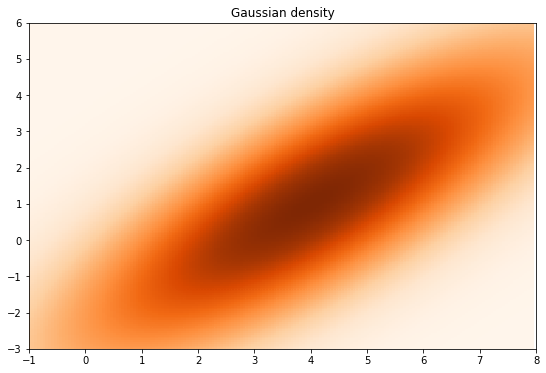

In [2]:
grid = np.mgrid[-8:8:0.05, -8:8:0.05]
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=[1, 4], cov=[[10, 8], [8, 10]])
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[0].shape[1])])
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.xlim(-1, 8)
plt.ylim(-3, 6)
plt.title('Gaussian density')

plt.show()

Задаём функцию, которая считает условную плотность в зависимости от значения параметра y:

In [3]:
def conditional_density(y_value):
    def combine_density(x):
        return sps.multivariate_normal.pdf((x,y_value), mean=[1, 4], cov=[[10, 8], [8, 10]])
    xs = np.arange(-10,10,0.1)
    ys = np.array([sps.multivariate_normal.pdf((x,y_value), mean=[1, 4], cov=[[10, 8], [8, 10]]) / 
                                              quad(combine_density,-np.inf,np.inf)[0] for x in xs])
    plt.figure(figsize=(20, 6))
    plt.plot(xs,ys)
    plt.title('Conditional density')
    plt.show()

Теперь строим графики условных плотностей для различных значений y:

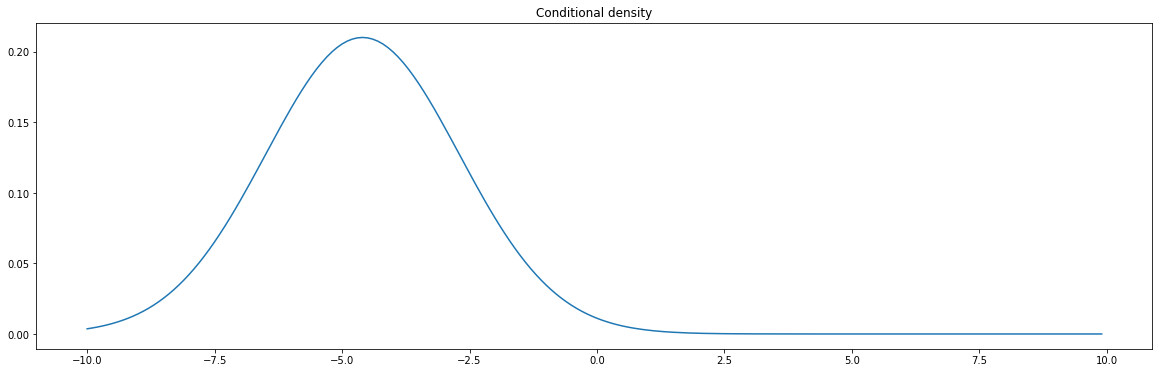

In [4]:
conditional_density(-3)

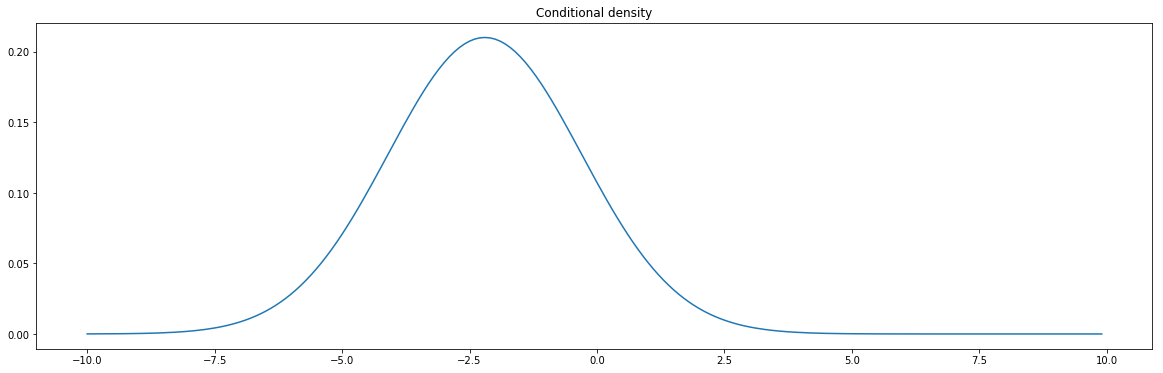

In [5]:
conditional_density(0)

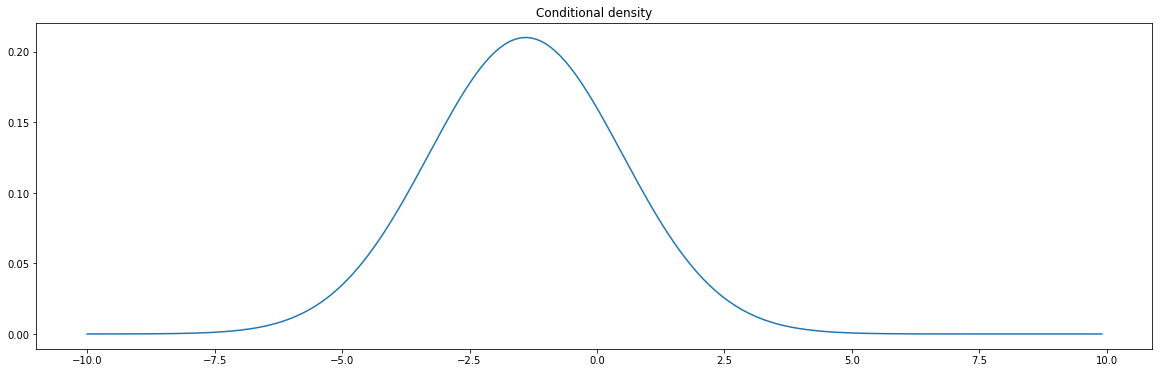

In [6]:
conditional_density(1)

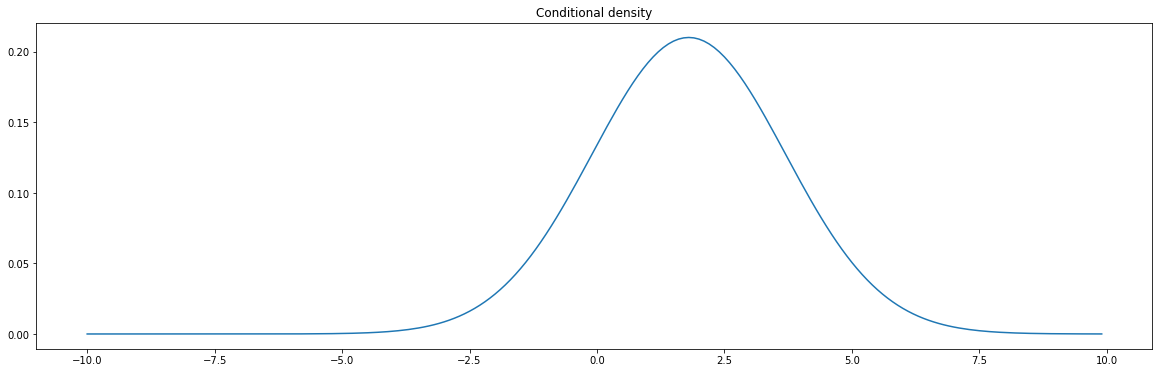

In [7]:
conditional_density(5)

Теперь посчитаем "вручную" $E(\xi_{1} \mid \xi_{2} = y)$. Пусть $x = \alpha y + z$, где $cov(z,y) = 0$, т.е. y и z независимы. Тогда $E(x \mid y) = E(\alpha y + z \mid y) = \alpha y + Ez$. Выразим z  из соотношения выше: $z = x - \alpha y$. Отсюда легко находим $cov(x - \alpha y,y) = cov(x,y) - \alpha Dy = 8 - 10\alpha = 0$. Следовательно, $\alpha = 0.8$. Окончательно: $E(x \mid y) = 0.8y + E(x - \alpha y) = 0.8y - 2.2$. То есть $E(\xi_{1} \mid \xi_{2} = y) = 0.8y - 2.2$. Остаётся построить график $E(\xi_{1} \mid \xi_{2} = y)$ в зависимости от y, а также нанести на этом графике прямую $x = E\xi_{1}$:

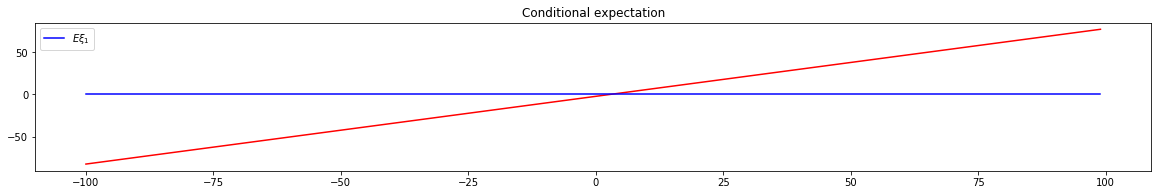

In [9]:
e_xi_value = 1
e_xi = np.ones(200)
x_values = np.arange(-100,100)
y_values = []
for i in range(200):
    y_values.append(float(float(x_values[i] * 0.8 - 2.2)))
plt.figure(figsize=(20, 6))
plt.subplot(211)
plt.plot(x_values,y_values,color='red')
plt.plot(x_values,e_xi,color='blue', label=r'$E\xi_{1}$')
plt.title('Conditional expectation')
plt.legend()
plt.show()

Вывод: При изменении значения y, условная плотность сдвигается относительно оси Ox. Условное матожидание $E(\xi_{1} \mid \xi_{2}) = y$ линейно зависит от параметра y.